In [1]:
import torch
import torch.nn as nn

from model_factories import get_golem_model, get_resnet18_model, get_resnet34_model, get_vitbase_model
from dataloaders import get_dataloaders
from model_utils import train_epoch, eval, getBestModelParams
from plotter import plot_images, plot_metrics

In [2]:
device = torch.device(
        "mps"
        if torch.backends.mps.is_available()
        else "cuda" if torch.cuda.is_available() else "cpu"
    )

EPOCHS = 20

IsTesting = False
if IsTesting:
    data_name = "cifar10"
else:
    data_name = "cifar100"

# CIFAR-10(0) TEST RUN

In [3]:
train_loader, test_loader, classes = get_dataloaders(test_run=IsTesting)
CLASSES_NUM = len(classes)

## Optimal Model Hyperparameters for Custom Backbone Classifier

In [4]:
# gc = get_golem_model(CLASSES_NUM)
# gc.to(device)

# lr, loss, criterion, optim = getBestModelParams(gc, train_loader, device)
# print(f"Optim lr: {lr}\nLoss: {loss}\nBest optim: {optim}\nBest loss func: {criterion}")

# LR = lr

LR = 1e-3
criterion = nn.CrossEntropyLoss
optim = torch.optim.Adam

## Sceanrio 1 - Custom Backbone

In [ ]:
gc = get_golem_model(CLASSES_NUM)
gc.to(device)

criterion_gc = criterion()
optimizer_gc = optim(params=gc.parameters(), lr=LR)

model_name = "customBackbone"

In [ ]:
training_losses = []
validation_losses = []

for i in range(EPOCHS):
    loss = train_epoch(gc, criterion_gc, optimizer_gc, train_loader, device)
    print(f"{i+1}/{EPOCHS}: loss={loss}")

In [ ]:
loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("Custom backbone results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

plot_images(test_loader, preds, classes, title=f"Classification_{data_name}_{model_name}")
plot_metrics(metrics, title=f"Metrics_{data_name}_{model_name}")

## Scenario 2 - ResNet18

In [9]:
gc = get_resnet18_model(CLASSES_NUM, criterion, LR, optim, train_loader, device)

criterion_gc = criterion()
model_name = "resnet18"

ResNet18 results: 
Avg loss 3.9088820113411433
Accu 0.5009999871253967
Precision 0.5140556156566238
Recall 0.5009999999999999
F-score 0.502703880082058



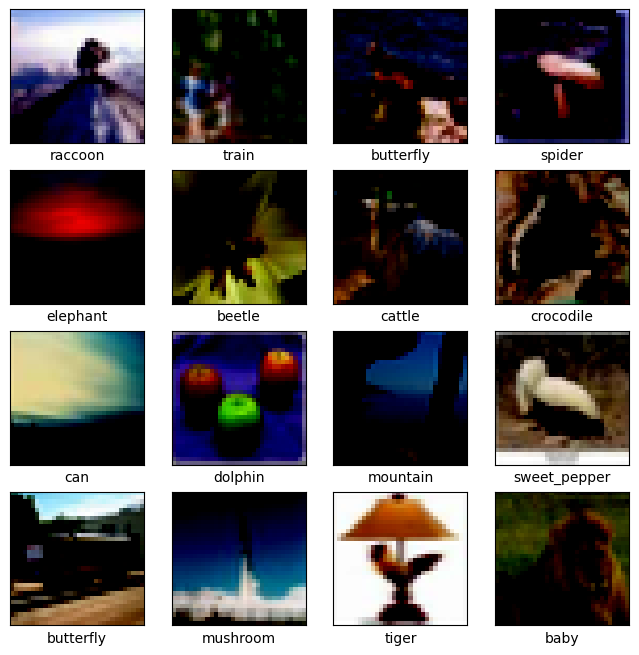

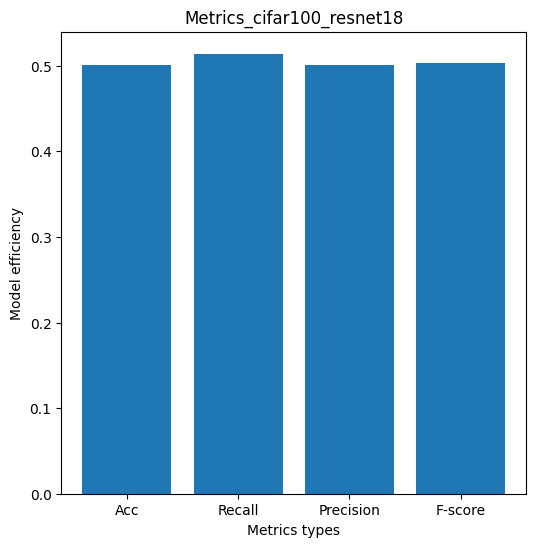

In [10]:
loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("ResNet18 results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

plot_images(test_loader, preds, classes, title=f"Classification_{data_name}_{model_name}")
plot_metrics(metrics, title=f"Metrics_{data_name}_{model_name}")

## Scenario 3 - ResNet34

In [7]:
gc = get_resnet34_model(CLASSES_NUM, criterion, LR, optim, train_loader, device)

criterion_gc = criterion()
optimizer_gc = optim(params=gc.parameters(), lr=LR)

model_name = "resnet34"

ResNet34 results: 
Avg loss 3.6572154805630066
Accu 0.5005000233650208
Precision 0.5117538951494864
Recall 0.5005
F-score 0.5011407874371296



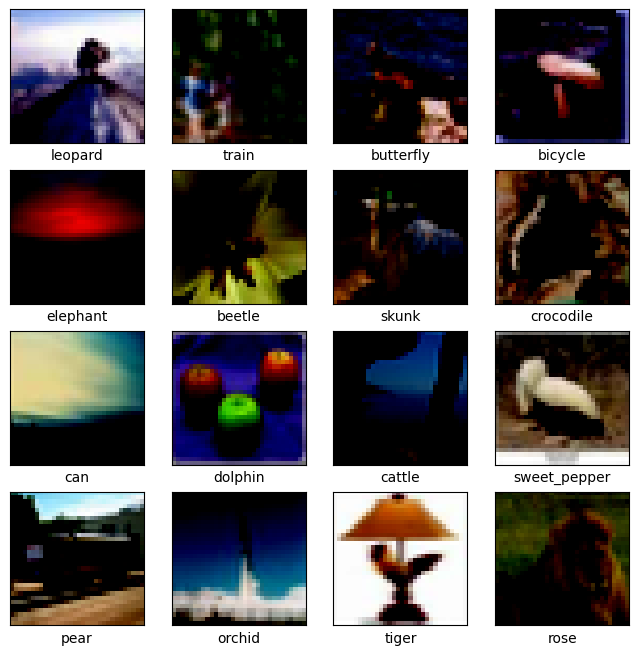

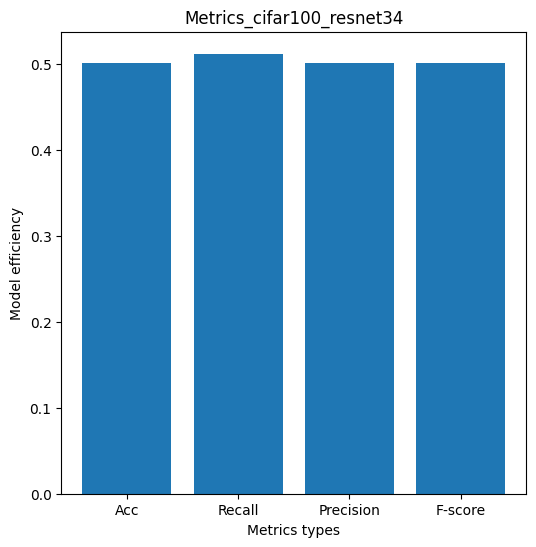

In [8]:
loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("ResNet34 results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

plot_images(test_loader, preds, classes, title=f"Classification_{data_name}_{model_name}")
plot_metrics(metrics, title=f"Metrics_{data_name}_{model_name}")

# #TO FIX - Data for ViTbase Model
Models use images of size 224x224

In [ ]:
train_loader, test_loader, classes = get_dataloaders(test_run=IsTesting, img_size=224)
CLASSES_NUM = len(classes)

## Scenario 4 - ViTbase

In [ ]:
gc = get_vitbase_model(CLASSES_NUM)
gc.to(device)

criterion_gc = criterion()
optimizer_gc = optim(params=gc.parameters(), lr=LR)

model_name = "vitbase"

In [ ]:
for i in range(EPOCHS):
    loss = train_epoch(gc, criterion_gc, optimizer_gc, train_loader, device)
    print(f"{i+1}/{EPOCHS}: loss={loss}")

In [ ]:
loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("ViTbase results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

plot_images(test_loader, preds, classes, title=f"Classification_{data_name}_{model_name}")
plot_metrics(metrics, title=f"Metrics_{data_name}_{model_name}")